In [1]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")


In [1]:
#load the dataset and tokenize

import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import gc
import psutil

# Function to check memory usage
def memory_usage_psutil():
    process = psutil.Process()
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024) 


# Step 1: Import NLTK and Download Necessary Resources
import nltk
# nltk.download('punkt')

# Step 2: Read the Dataset
# Update the file path as needed
file_path = "../input/amharic-dataset/GPAC.txt"
df = pd.read_csv(file_path, header=None)
text_series=df[0]
# Combine all rows in the 'text' column into a single string (assuming the column is named 'text')
text = " ".join(text_series.astype(str))# text = " ".join(df[0].astype(str))

tokens=text.split()
tokens = [token for token in tokens if token not in string.punctuation]
num_tokens = len(tokens)
print(f"total Number of tokens in the dataset: {num_tokens}")
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

total Number of tokens in the dataset: 80530797
Final memory usage: 8512.65 MB


In [2]:
# Function to check memory usage
def memory_usage_psutil():
    process = psutil.Process()
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024) 

In [4]:
def generate_ngrams(tokens, n):
    ngram_counts = Counter()
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i + n])
        ngram_counts[ngram] += 1
    return ngram_counts

## unigram

In [5]:
gc.collect()
unigrams = generate_ngrams(tokens, 1)
# Print first 100 unigrams in a well-formatted output
print("Unigrams:")
for ngram, freq in unigrams.most_common(20):
    print(f"{ngram}")
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

Unigrams:
('።',)
('ላይ',)
('ነው',)
('፣',)
('፤',)
('ውስጥ',)
('ወደ',)
('እና',)
('ጋር',)
('ግን',)
('ጊዜ',)
('ነገር',)
('ደግሞ',)
('ነው፡፡',)
('አንድ',)
('ይህ',)
('ብቻ',)
('ነበር',)
('እንደ',)
('ቤት',)
Final memory usage: 8721.99 MB


## Frequencies top (10)¶


In [6]:
gc.collect()
for ngram, freq in unigrams.most_common(10):
    print(f"{ngram}: {freq}")
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

('።',): 2179373
('ላይ',): 750289
('ነው',): 746530
('፣',): 701323
('፤',): 408023
('ውስጥ',): 343748
('ወደ',): 329377
('እና',): 317907
('ጋር',): 290409
('ግን',): 265805
Final memory usage: 8722.37 MB


## Probabilies (top 10)¶


In [7]:
gc.collect()
unigram_probs = {unigram: count / num_tokens for unigram, count in unigrams.items()}
# Get the top 10 unigrams and their counts
top_10_unigrams = unigrams.most_common(10)
# Print top 10 unigrams with their counts and probabilities
print("Top 10 Unigrams with Counts and Probabilities:")
for unigram, count in top_10_unigrams:
    probability = unigram_probs[unigram]
    print(f"Unigram: {unigram}, Frequency: {count}, Probability: {probability:.10f}")
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")
unigram_probs=None
gc.collect()

Top 10 Unigrams with Counts and Probabilities:
Unigram: ('።',), Frequency: 2179373, Probability: 0.0270626031
Unigram: ('ላይ',), Frequency: 750289, Probability: 0.0093167959
Unigram: ('ነው',), Frequency: 746530, Probability: 0.0092701181
Unigram: ('፣',), Frequency: 701323, Probability: 0.0087087552
Unigram: ('፤',), Frequency: 408023, Probability: 0.0050666703
Unigram: ('ውስጥ',), Frequency: 343748, Probability: 0.0042685285
Unigram: ('ወደ',), Frequency: 329377, Probability: 0.0040900750
Unigram: ('እና',), Frequency: 317907, Probability: 0.0039476450
Unigram: ('ጋር',), Frequency: 290409, Probability: 0.0036061856
Unigram: ('ግን',), Frequency: 265805, Probability: 0.0033006627
Final memory usage: 8921.57 MB


0

## Conditional Probability (top 10)¶


In [8]:
gc.collect()
# Total count of all unigrams
total_count = sum(unigrams.values())
# Calculate conditional probability for each unigram
conditional_probabilities = {word: count / total_count for word, count in unigrams.items()}
# Sort by probability in descending order and select the top 10
top_10 = sorted(conditional_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
# Display the top 10
print("Top 10 Conditional Probabilities:")
for word, prob in top_10:
    print(f"P({word}) = {prob:.10f}")
conditional_probabilities=None
gc.collect()

Top 10 Conditional Probabilities:
P(('።',)) = 0.0270626031
P(('ላይ',)) = 0.0093167959
P(('ነው',)) = 0.0092701181
P(('፣',)) = 0.0087087552
P(('፤',)) = 0.0050666703
P(('ውስጥ',)) = 0.0042685285
P(('ወደ',)) = 0.0040900750
P(('እና',)) = 0.0039476450
P(('ጋር',)) = 0.0036061856
P(('ግን',)) = 0.0033006627


0

## Word cloud for unigrams

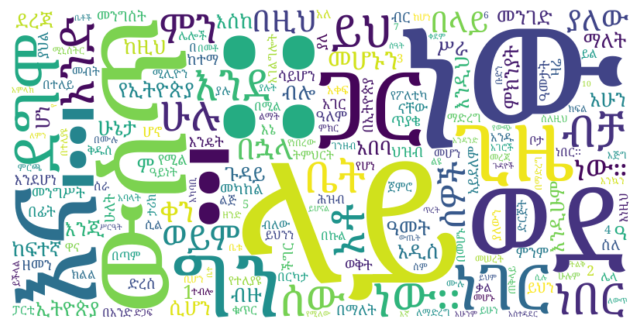

2135

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# File path to the font (if applicable)

font_path = "../input/fontet/NotoSerifEthiopic-VariableFont_wdth,wght.ttf"

unigram_dict_str = {"".join(key): value for key, value in unigrams.items()}
wordcloud = WordCloud(font_path=font_path ,width=800, height=400, background_color='white').generate_from_frequencies(unigram_dict_str)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()
unigram_dict_str=None
wordcloud=None
gc.collect()

In [ ]:
stop_words = [
"የእኛ","እኛ ራሳችን","አንቺ","ያንተ","ራስህን","እራሳችሁ","እሱ","የእሱ","ራሱ","እሷ","የእሷ","እራሷ","እነሱ","እነሱን","የእነሱ","ራሳቸው","ምንድን","የትኛው","የአለም ጤና ድርጅት","ማን","የእኔ","ይገባል",
"እኔ ራሴ","እኛ","ይህ","የሚል ነው","እነዚህ","እነዚያ","ነኝ","ነው","ናቸው","ነበር","ነበሩ","ሁን","ቆይቷል","መሆን","አላቸው","አለው","ነበረው","ያለው","መስራት","ያደርጋል","አደረገ","ማድረግ","አንድ","የ",
"እና","ግን","ከሆነ","ወይም","ምክንያቱም","እንደ","እስከ","እያለ","የ","ለ","ጋር","ስለ","ላይ","መካከል","ወደ","በኩል","ወቅት","ከዚህ በፊት","በኋላ","ከላይ","ከታች","ወደከ","ወደ ላይ","እኔ",
"ታች","ውስጥ","ውጭ","ላይ","ጠፍቷል","በላይ","በታች","እንደገና","ተጨማሪ","ከዚያ","አንድ ጊዜ","እዚህ","እዚያ","መቼ","የት","እንዴት","ሁሉም","ማንኛውም","ሁለቱም","እያንዳንዳቸው","ዶን",
"ጥቂቶች","ተጨማሪ","በጣም","ሌላ","አንዳንድ","እንደዚህ","አይ","ወይም አይደለም","አይደለም","ብቻ","የራሱ","ተመሳሳይ","ስለዚህ","ይልቅ","እንዲሁ","በጣም","እ.ኤ.አ.","ት","ይችላል","ያደርጋል","ብቻ","አሁን"
]
def remove_stopwords(unigrams, stop_words):

    stop_words_set = set(stop_words) # Ensure stop_words is a set for fast membership checking
    return [word for word in unigrams if word not in stop_words]


filtered_unigrams = remove_stopwords(unigrams, stop_words)
print("Filtered Unigrams:", filtered_unigrams)
gc.collect()
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

In [ ]:
# random sentence generation
def generate_random_sentence(unigram_counts, length=10): 
    words = list(unigram_counts.keys()) 
    sentence = " ".join(random.choices(words, k=length)) 
    return sentence 
# Example usage: Generate a random sentence of 10 words 
random_sentence = generate_random_sentence(unigram_counts, length=10) 
print("Random Sentence:", random_sentence)

## Memory Reclaim

In [8]:
unigram_dict_str=None
unigrams = None
top_10_unigrams=None
unigram_counts = None
unigram_probs = None
conditional_probabilities=None
wordclou=None
del unigram_dict_str, unigrams ,top_10_unigrams ,unigram_counts, unigram_probs, conditional_probabilities,wordclou
gc.collect()
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

Final memory usage: 8692.78 MB


## Bigram

In [9]:
gc.collect()
bigrams = generate_ngrams(tokens, 2)
# Print first 100 unigrams in a well-formatted output
print("bigrams:")
for ngram, freq in bigrams.most_common(20):
    print(f"{ngram}")
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

bigrams:
('ነው', '።')
('ነበር', '።')
('ዓ', 'ም')
('ናቸው', '።')
('።', 'ይህ')
('ነገር', 'ግን')
('አዲስ', 'አበባ')
('ብቻ', 'ሳይሆን')
('አይደለም', '።')
('1', '1')
('።', 'በዚህ')
('2', '2')
('ምክር', 'ቤት')
('በአዲስ', 'አበባ')
('ይችላል', '።')
('ነው', '፤')
('ብለዋል', '።')
('ይሆናል', '።')
('ተናግረዋል', '።')
('።', 'ከዚህ')
Final memory usage: 11736.11 MB


## Bigram frequencies top 10

In [10]:
gc.collect()
for ngram, freq in bigrams.most_common(10):
    print(f"{ngram}: {freq}")
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

('ነው', '።'): 310291
('ነበር', '።'): 100128
('ዓ', 'ም'): 93634
('ናቸው', '።'): 49016
('።', 'ይህ'): 43711
('ነገር', 'ግን'): 42660
('አዲስ', 'አበባ'): 30018
('ብቻ', 'ሳይሆን'): 29200
('አይደለም', '።'): 28908
('1', '1'): 28659
Final memory usage: 11736.11 MB


## Bigram Probabilities top 10

In [11]:
gc.collect()
bigram_probs = {bigram: count / num_tokens for bigram, count in bigrams.items()}
# Get the top 10 unigrams and their counts
top_10_bigrams = bigrams.most_common(10)
# Print top 10 unigrams with their counts and probabilities
print("Top 10 bigrams with Counts and Probabilities:")
for bigram, count in top_10_bigrams:
    probability = bigram_probs[bigram]
    print(f"bigram: {bigram}, Frequency: {count}, Probability: {probability:.10f}")
# print("Unigram Probabilities:")
# for word, prob in list(unigram_probs.items())[:20]:
#     print(f"P({word}) = {prob:.10f}")
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")
bigram_probs=None
probability=None
gc.collect()

Top 10 bigrams with Counts and Probabilities:
bigram: ('ነው', '።'), Frequency: 310291, Probability: 0.0038530725
bigram: ('ነበር', '።'), Frequency: 100128, Probability: 0.0012433504
bigram: ('ዓ', 'ም'), Frequency: 93634, Probability: 0.0011627105
bigram: ('ናቸው', '።'), Frequency: 49016, Probability: 0.0006086616
bigram: ('።', 'ይህ'), Frequency: 43711, Probability: 0.0005427861
bigram: ('ነገር', 'ግን'), Frequency: 42660, Probability: 0.0005297352
bigram: ('አዲስ', 'አበባ'), Frequency: 30018, Probability: 0.0003727518
bigram: ('ብቻ', 'ሳይሆን'), Frequency: 29200, Probability: 0.0003625942
bigram: ('አይደለም', '።'), Frequency: 28908, Probability: 0.0003589683
bigram: ('1', '1'), Frequency: 28659, Probability: 0.0003558763
Final memory usage: 13894.29 MB


0

## Conditional Probability (top 10)¶


In [12]:
gc.collect()
# Total count of all unigrams
total_count = sum(bigrams.values())
# Calculate conditional probability for each unigram
conditional_probabilities = {word: count / total_count for word, count in bigrams.items()}
# Sort by probability in descending order and select the top 10
top_10 = sorted(conditional_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
# Display the top 10
print("Top 10 Conditional Probabilities:")
for word, prob in top_10:
    print(f"P({word}) = {prob:.10f}")
conditional_probabilities=None
gc.collect()

Top 10 Conditional Probabilities:
P(('ነው', '።')) = 0.0038530726
P(('ነበር', '።')) = 0.0012433504
P(('ዓ', 'ም')) = 0.0011627105
P(('ናቸው', '።')) = 0.0006086616
P(('።', 'ይህ')) = 0.0005427861
P(('ነገር', 'ግን')) = 0.0005297352
P(('አዲስ', 'አበባ')) = 0.0003727518
P(('ብቻ', 'ሳይሆን')) = 0.0003625942
P(('አይደለም', '።')) = 0.0003589683
P(('1', '1')) = 0.0003558763


0

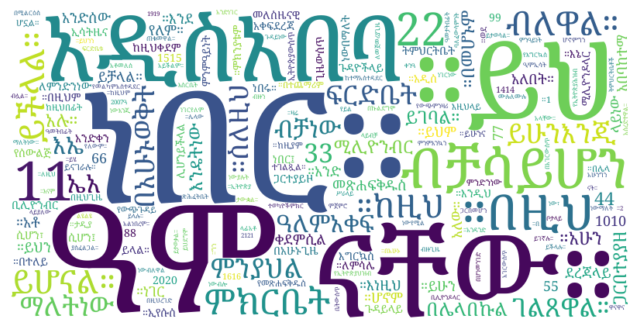

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# File path to the font (if applicable)

font_path = "../input/fontet/NotoSerifEthiopic-VariableFont_wdth,wght.ttf"

bigram_dict_str = {"".join(key): value for key, value in bigrams.items()}
wordcloud = WordCloud(font_path=font_path ,width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict_str)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

## Memory Reclaim for trigrams

In [16]:
bigram_dict_str=None
bigrams = None
top_10_bigrams=None
bigram_counts = None
bigram_probs = None
conditional_probabilities=None
wordclou=None
del bigram_dict_str, bigrams ,top_10_bigrams ,bigram_counts, bigram_probs, conditional_probabilities,wordclou
gc.collect()
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

Final memory usage: 8977.01 MB


## Trigram

In [17]:
gc.collect()
trigrams = generate_ngrams(tokens, 3)
# Print first 100 unigrams in a well-formatted output
print("trigrams:")
for ngram, freq in trigrams.most_common(20):
    print(f"{ngram}")
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

trigrams:
('እ', 'ኤ', 'አ')
('።', 'ነገር', 'ግን')
('።', 'ይሁን', 'እንጂ')
('ማለት', 'ነው', '።')
('ነው', '።', 'ይህ')
('ብቻ', 'ነው', '።')
('ዓ', 'ም', 'ጀምሮ')
('2007', 'ዓ', 'ም')
('ቀን', 'ዓ', 'ም')
('ተወካዮች', 'ምክር', 'ቤት')
('።', 'በሌላ', 'በኩል')
('2008', 'ዓ', 'ም')
('ላይ', 'ነው', '።')
('ሊሆን', 'ይችላል', '።')
('በሌላ', 'በኩል', 'ደግሞ')
('።', '1', '1')
('።', 'አዲስ', 'አበባ')
('ነው', 'ብለዋል', '።')
('የአዲስ', 'አበባ', 'ከተማ')
('።', '2', '2')
Final memory usage: 14522.17 MB


## Top 10 frequencies

In [18]:
gc.collect()
# Get the top 10 most common unigrams
for ngram, freq in trigrams.most_common(10):
    print(f"{ngram}: {freq}")

('እ', 'ኤ', 'አ'): 15691
('።', 'ነገር', 'ግን'): 12771
('።', 'ይሁን', 'እንጂ'): 10543
('ማለት', 'ነው', '።'): 10500
('ነው', '።', 'ይህ'): 7502
('ብቻ', 'ነው', '።'): 6799
('ዓ', 'ም', 'ጀምሮ'): 5877
('2007', 'ዓ', 'ም'): 5813
('ቀን', 'ዓ', 'ም'): 5647
('ተወካዮች', 'ምክር', 'ቤት'): 5500


## Top 10 probabilities

In [19]:
gc.collect()
trigram_probs = {trigram: count / num_tokens for trigram, count in trigrams.items()}
# Get the top 10 unigrams and their counts
top_10_trigrams = trigrams.most_common(10)
# Print top 10 unigrams with their counts and probabilities
print("Top 10 trigrams with Counts and Probabilities:")
for trigram, count in top_10_trigrams:
    probability = trigram_probs[trigram]
    print(f"trigram: {trigram}, Frequency: {count}, Probability: {probability:.10f}")
# print("Unigram Probabilities:")
# for word, prob in list(unigram_probs.items())[:20]:
#     print(f"P({word}) = {prob:.10f}")
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")
trigram_probs=None
top_10_trigrams=None
probability=None
gc.collect()

Top 10 trigrams with Counts and Probabilities:
trigram: ('እ', 'ኤ', 'አ'), Frequency: 15691, Probability: 0.0001948447
trigram: ('።', 'ነገር', 'ግን'), Frequency: 12771, Probability: 0.0001585853
trigram: ('።', 'ይሁን', 'እንጂ'), Frequency: 10543, Probability: 0.0001309189
trigram: ('ማለት', 'ነው', '።'), Frequency: 10500, Probability: 0.0001303849
trigram: ('ነው', '።', 'ይህ'), Frequency: 7502, Probability: 0.0000931569
trigram: ('ብቻ', 'ነው', '።'), Frequency: 6799, Probability: 0.0000844273
trigram: ('ዓ', 'ም', 'ጀምሮ'), Frequency: 5877, Probability: 0.0000729783
trigram: ('2007', 'ዓ', 'ም'), Frequency: 5813, Probability: 0.0000721836
trigram: ('ቀን', 'ዓ', 'ም'), Frequency: 5647, Probability: 0.0000701222
trigram: ('ተወካዮች', 'ምክር', 'ቤት'), Frequency: 5500, Probability: 0.0000682969
Final memory usage: 18707.64 MB


0

## Conditional probability

In [20]:
gc.collect()
	# Total count of all unigrams
total_count = sum(trigrams.values())
	# Calculate conditional probability for each unigram
conditional_probabilities = {word: count / total_count for word, count in trigrams.items()}
	# Sort by probability in descending order and select the top 10
top_10 = sorted(conditional_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
	# Display the top 10
print("Top 10 Conditional Probabilities:")
for word, prob in top_10:
	    print(f"P({word}) = {prob:.10f}")
total_count=None
conditional_probabilities=None
top_10=None
gc.collect()

Top 10 Conditional Probabilities:
P(('እ', 'ኤ', 'አ')) = 0.0001948447
P(('።', 'ነገር', 'ግን')) = 0.0001585853
P(('።', 'ይሁን', 'እንጂ')) = 0.0001309189
P(('ማለት', 'ነው', '።')) = 0.0001303849
P(('ነው', '።', 'ይህ')) = 0.0000931569
P(('ብቻ', 'ነው', '።')) = 0.0000844273
P(('ዓ', 'ም', 'ጀምሮ')) = 0.0000729783
P(('2007', 'ዓ', 'ም')) = 0.0000721836
P(('ቀን', 'ዓ', 'ም')) = 0.0000701222
P(('ተወካዮች', 'ምክር', 'ቤት')) = 0.0000682969


0

## wordcloud for trigrams

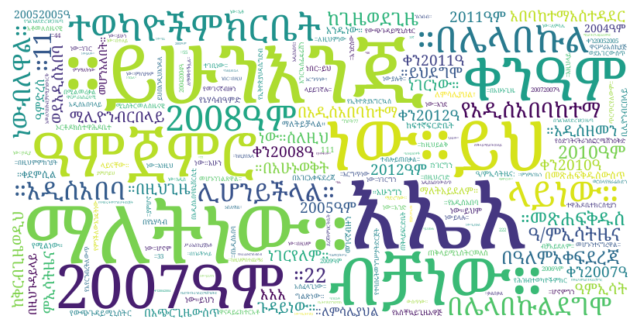

2129

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# File path to the font (if applicable)

font_path = "../input/fontet/NotoSerifEthiopic-VariableFont_wdth,wght.ttf"

trigram_dict_str = {"".join(key): value for key, value in trigrams.items()}
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(trigram_dict_str)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()
# memory reclaim
trigram_dict=None
trigram_dict_str=None
wordcloud=None
gc.collect()

## Memory reclaim for quadragram

In [22]:
trigram=None
trigram_dict=None
trigrams = None
top_10_trigrams=None
trigram_counts = None
trigram_probs = None
conditional_probabilities=None
wordclou=None
del trigram_dict_str, trigram_dict, trigrams ,top_10_trigrams ,trigram_counts, trigram_probs, conditional_probabilities,wordclou
gc.collect()
# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

Final memory usage: 8807.08 MB


## Quadragram

In [5]:
gc.collect()
gram_4 = generate_ngrams(tokens, 4)
	# Print first 100 unigrams in a well-formatted output
print("4 grams:")
for ngram, freq in gram_4.most_common(20):
    print(f"{ngram}")
	# Final memory usage
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

4 grams:
('ቀን', '2008', 'ዓ', 'ም')
('ዓ', 'ም', 'ኢሳት', 'ዜና')
('ቀን', '2007', 'ዓ', 'ም')
('ቀን', '2010', 'ዓ', 'ም')
('ቀን', '2011', 'ዓ', 'ም')
('ቀን', '2012', 'ዓ', 'ም')
('2005', '2005', 'ዓ', 'ም')
('የአዲስ', 'አበባ', 'ከተማ', 'አስተዳደር')
('በ', 'የኔ', 'ሃሳብ', 'ዓምድ')
('2004', '2004', 'ዓ', 'ም')
('ነው', '።', 'ነገር', 'ግን')
('።', 'ለምሳሌ', 'ያህል', '፣')
('ኦርቶዶክስ', 'ተዋሕዶ', 'ቤተ', 'ክርስቲያን')
('የሕዝብ', 'ተወካዮች', 'ምክር', 'ቤት')
('።', 'በሌላ', 'በኩል', 'ደግሞ')
('2007', '2007', 'ዓ', 'ም')
('ቀን', '2005', '2005', 'ዓ')
('1', '1', '1', '1')
('ነው', '።', 'ይሁን', 'እንጂ')
('ጠቅላይ', 'ሚኒስትር', 'መለስ', 'ዜናዊ')
Final memory usage: 15898.58 MB


In [6]:
gram_4_counts = Counter(gram_4)
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")

Final memory usage: 18458.58 MB


## Top 10 frequencies

In [25]:
gc.collect()
# Get the top 10 most common unigrams
for ngram, freq in gram_4.most_common(10):
    print(f"{ngram}: {freq}")

('ቀን', '2008', 'ዓ', 'ም'): 3854
('ዓ', 'ም', 'ኢሳት', 'ዜና'): 3639
('ቀን', '2007', 'ዓ', 'ም'): 3363
('ቀን', '2010', 'ዓ', 'ም'): 3281
('ቀን', '2011', 'ዓ', 'ም'): 3192
('ቀን', '2012', 'ዓ', 'ም'): 2768
('2005', '2005', 'ዓ', 'ም'): 2480
('የአዲስ', 'አበባ', 'ከተማ', 'አስተዳደር'): 2230
('በ', 'የኔ', 'ሃሳብ', 'ዓምድ'): 2081
('2004', '2004', 'ዓ', 'ም'): 1919


## Top 10 Probabilities

In [26]:
gc.collect()
gram_4_probs = {gram_4: count / num_tokens for gram_4, count in gram_4.items()}
# Get the top 10 unigrams and their counts
top_10_gram_4 = gram_4.most_common(10)
# Print top 10 unigrams with their counts and probabilities
print("Top 10 bigrams with Counts and Probabilities:")
for gram_4_key, count in top_10_gram_4:
	probability = gram_4_probs[gram_4_key]
	print(f"bigram: {gram_4_key}, Frequency: {count}, Probability: {probability:.10f}")
print(f"Final memory usage: {memory_usage_psutil():.2f} MB")
gram_4_probs=None
top_10_gram_4=None
probability=None
gc.collect()

Top 10 bigrams with Counts and Probabilities:
bigram: ('ቀን', '2008', 'ዓ', 'ም'), Frequency: 3854, Probability: 0.0000478575
bigram: ('ዓ', 'ም', 'ኢሳት', 'ዜና'), Frequency: 3639, Probability: 0.0000451877
bigram: ('ቀን', '2007', 'ዓ', 'ም'), Frequency: 3363, Probability: 0.0000417604
bigram: ('ቀን', '2010', 'ዓ', 'ም'), Frequency: 3281, Probability: 0.0000407422
bigram: ('ቀን', '2011', 'ዓ', 'ም'), Frequency: 3192, Probability: 0.0000396370
bigram: ('ቀን', '2012', 'ዓ', 'ም'), Frequency: 2768, Probability: 0.0000343719
bigram: ('2005', '2005', 'ዓ', 'ም'), Frequency: 2480, Probability: 0.0000307957
bigram: ('የአዲስ', 'አበባ', 'ከተማ', 'አስተዳደር'), Frequency: 2230, Probability: 0.0000276913
bigram: ('በ', 'የኔ', 'ሃሳብ', 'ዓምድ'), Frequency: 2081, Probability: 0.0000258410
bigram: ('2004', '2004', 'ዓ', 'ም'), Frequency: 1919, Probability: 0.0000238294
Final memory usage: 23138.35 MB


0

## Conditional probability

In [27]:
gc.collect()
	# Total count of all unigrams
total_count = sum(gram_4.values())
	# Calculate conditional probability for each unigram
conditional_probabilities = {word: count / total_count for word, count in gram_4.items()}
	# Sort by probability in descending order and select the top 10
top_10 = sorted(conditional_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
	# Display the top 10
print("Top 10 Conditional Probabilities:")
for word, prob in top_10:
	print(f"P({word}) = {prob:.10f}")
conditional_probabilities=None
gc.collect()

Top 10 Conditional Probabilities:
P(('ቀን', '2008', 'ዓ', 'ም')) = 0.0000478575
P(('ዓ', 'ም', 'ኢሳት', 'ዜና')) = 0.0000451877
P(('ቀን', '2007', 'ዓ', 'ም')) = 0.0000417604
P(('ቀን', '2010', 'ዓ', 'ም')) = 0.0000407422
P(('ቀን', '2011', 'ዓ', 'ም')) = 0.0000396370
P(('ቀን', '2012', 'ዓ', 'ም')) = 0.0000343719
P(('2005', '2005', 'ዓ', 'ም')) = 0.0000307957
P(('የአዲስ', 'አበባ', 'ከተማ', 'አስተዳደር')) = 0.0000276913
P(('በ', 'የኔ', 'ሃሳብ', 'ዓምድ')) = 0.0000258410
P(('2004', '2004', 'ዓ', 'ም')) = 0.0000238294


0

## Word cloud for quadragram

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# File path to the font (if applicable)

font_path = "../input/fontet/NotoSerifEthiopic-VariableFont_wdth,wght.ttf"

gram_4_dict_str = {"".join(key): value for key, value in gram_4.items()}
wordcloud = WordCloud(font_path=font_path,width=800, height=400, background_color='white').generate_from_frequencies(gram_4_dict_str)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

1.6 what is the probability of the sentence."ኢትዮጵያ ታሪካዊ ሀገር ናት ".

In [ ]:
from nltk.util import bigrams
from collections import Counter


input_sentence = "ኢትዮጵያ ታሪካዊ ሀገር ናት"
input_tokens = word_tokenize(input_sentence)


# Generate bigrams from the training corpus
train_bigrams = list(bigrams(tokens))

# Count the frequency of each bigram in the training data
bigram_freq = Counter(train_bigrams)

# Calculate unigram frequencies for normalization
unigram_freq = Counter(tokens)

# Function to calculate bigram probability for a given sentence
def calculate_bigram_probability(input_tokens, bigram_freq, unigram_freq):
    probability = 1.0
    for i in range(1, len(input_tokens)):
        # Previous word
        prev_word = input_tokens[i - 1]
        # Current word
        current_word = input_tokens[i]

        # Calculate the bigram probability
        bigram = (prev_word, current_word)
        bigram_count = bigram_freq.get(bigram, 0)
        unigram_count = unigram_freq.get(prev_word, 0)

        # If unigram count is zero, it means we can't calculate probability for this bigram
        if unigram_count == 0:
            probability *= 0  # This will make the whole probability zero
        else:
            probability *= bigram_count / unigram_count

    return probability

# Calculate the probability of the input sentence
sentence_probability = calculate_bigram_probability(input_tokens, bigram_freq, unigram_freq)
print(f"The probability of the sentence '{input_sentence}' is: {sentence_probability}")


# Intrinisic evaluation

In [3]:
import math
from nltk.util import bigrams, trigrams
from collections import Counter
from nltk import word_tokenize
import re
import random
from sklearn.model_selection import train_test_split


# Amharic punctuation regex pattern
punctuation_pattern = r"[፣፤፥፦፧፨፩፪፫፬፭፮፯]"

# Tokenize the text based on Amharic punctuation and spaces
tokens = re.split(f'({punctuation_pattern}| )', text)
tokens = [token.strip() for token in tokens if token.strip()]  # Remove any empty tokens

# Split the tokens into training and testing sets (80% for training, 20% for testing)
train_tokens, test_tokens = train_test_split(tokens, test_size=0.2, random_state=42)

# Print the results
print("Training Tokens:")
print(train_tokens)
print("\nTesting Tokens:")
print(test_tokens)




# Generate unigrams, bigrams, and trigrams
unigrams = tokens
bigrams = list(bigrams(tokens))
trigrams = list(trigrams(tokens))

# Count the frequency of unigrams, bigrams, and trigrams
unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Function to calculate bigram probability for a given sentence
def calculate_bigram_probability(input_tokens, bigram_freq, unigram_freq):
    probability = 1.0
    for i in range(1, len(input_tokens)):
        prev_word = input_tokens[i - 1]
        current_word = input_tokens[i]
        bigram = (prev_word, current_word)
        bigram_count = bigram_freq.get(bigram, 0)
        unigram_count = unigram_freq.get(prev_word, 0)

        # Avoid division by zero
        if unigram_count == 0:
            probability *= 0
        else:
            probability *= bigram_count / unigram_count

    return probability

# Calculate Perplexity and Log-Likelihood for a sentence using n-grams

def evaluate_sentence_perplexity(sentence, ngram_model, n, unigram_freq=None):
    tokens = word_tokenize(sentence)
    log_likelihood = 0.0
    ngram_model_freq = Counter(ngram_model)
    
    for i in range(1, len(tokens)):
        context = tuple(tokens[max(i - n + 1, 0):i])  # Context for bigram, trigram, etc.
        
        # Find the next word's probability based on context
        possible_next_words = [ngram[n-1] for ngram in ngram_model if ngram[:n-1] == context]
        
        if possible_next_words:
            word_prob = len(possible_next_words) / len(ngram_model)
            log_likelihood += math.log(word_prob)
        else:
            log_likelihood += math.log(1 / len(ngram_model))  # Smoothing
        
    # Perplexity calculation
    perplexity = math.exp(-log_likelihood / len(tokens))
    
    return perplexity, log_likelihood

# Example sentence to evaluate
sentence = "እንዴት ነህ ስለምን በአምላክ"

# Evaluate sentence for different n-grams
unigram_perplexity, unigram_loglikelihood = evaluate_sentence_perplexity(sentence, unigrams, 1)
bigram_perplexity, bigram_loglikelihood = evaluate_sentence_perplexity(sentence, bigrams, 2, unigram_freq)
trigram_perplexity, trigram_loglikelihood = evaluate_sentence_perplexity(sentence, trigrams, 3, unigram_freq)

print("lengt:",len(tokens))
print("Unigram Model:")
print(f"Perplexity: {unigram_perplexity}, Log-Likelihood: {unigram_loglikelihood}")

print("\nBigram Model:")
print(f"Perplexity: {bigram_perplexity}, Log-Likelihood: {bigram_loglikelihood}")

print("\nTrigram Model:")
print(f"Perplexity: {trigram_perplexity}, Log-Likelihood: {trigram_loglikelihood}")


lengt: 83207834
Unigram Model:
Perplexity: 871210.6238335363, Log-Likelihood: -54.7105561800379

Bigram Model:
Perplexity: 1047.6516540237706, Log-Likelihood: -27.817225673712386

Trigram Model:
Perplexity: 270250.94174176664, Log-Likelihood: -50.02842488080509


## Extrinsic evaluation text classification

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Step 1: Import NLTK and Download Necessary Resources
nltk.download('punkt')

# Step 2: Read the Amharic Dataset
file_path = "../input/amharic-dataset/GPAC.txt"  # Ensure this path is correct
df = pd.read_csv(file_path, header=None, names=['text', 'label'])

# Ensure that the text data is properly loaded and labeled
print(df.head())

# Step 3: Vectorize the text data using bigrams
vectorizer = CountVectorizer(tokenizer=nltk.word_tokenize, ngram_range=(1, 2))  # Using bigrams
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Train a classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = clf.predict(X_test)

# Step 7: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
print(classification_report(y_test, y_pred))


## Random Sentence

In [ ]:
import random

# Function to generate bigrams, trigrams, and higher n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Function to generate random sentence using n-grams
def generate_random_sentence(ngram_model, n, length=10):
    # Start with a random word
    sentence = [random.choice(ngram_model)[0]]  # Initial word
    
    for _ in range(length - 1):
        # Get the n-gram context (the last n-1 words)
        context = tuple(sentence[-(n-1):]) if n > 1 else ()
        
        # Filter n-grams based on the context (previous n-1 words)
        possible_next_words = [ngram[n-1] for ngram in ngram_model if ngram[:n-1] == context]
        
        if possible_next_words:
            # Choose the next word based on the n-gram
            next_word = random.choice(possible_next_words)
            sentence.append(next_word)
        else:
            # If no continuation is possible, stop the sentence
            break
    
    return ' '.join(sentence)

# Generate n-grams (unigrams, bigrams, trigrams)
unigrams = tokens
bigrams = generate_ngrams(tokens, 2)
trigrams = generate_ngrams(tokens, 3)

# Generate random sentences
print("Random Sentence using Unigrams:")
print(generate_random_sentence(unigrams, 1, length=10))

print("\nRandom Sentence using Bigrams:")
print(generate_random_sentence(bigrams, 2, length=10))

print("\nRandom Sentence using Trigrams:")
print(generate_random_sentence(trigrams, 3, length=10))
